In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


def moving_average(a, n=3) :
    weights = np.repeat(1.0, n)/n
    sma = np.convolve(a, weights, 'full')
    return sma[:-(n-1)]

In [26]:
#fname = 'log.txt'
fname = 'log_local.txt'

T = np.genfromtxt(fname, delimiter=',',dtype='uint64')
ptp = T[:,0];
hw = T[:,1];


# first timestamp is the reference
ptp0 = np.array(ptp - ptp[0],dtype='float');
hw0 = np.array(hw - hw[0],dtype='float');

# calc drift in ppm
drift_ppm = (ptp0[-1] - hw0[-1]) / ptp0[-1] * 1e6;
print "Clock drift: %lf ppm." % drift_ppm

Clock drift: -0.000012 ppm.


Timestamp deviation at the last timestamp: -0.000001. ms
Record length: 0.023108 hours


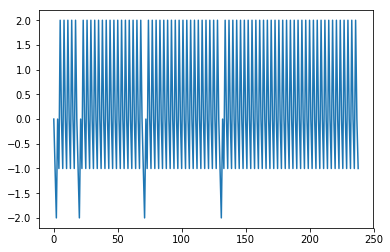

In [27]:
# plot timestamp difference
deviation = ptp0 - hw0;

avg_factor = 3;
deviation_avg = moving_average(deviation,n=avg_factor);

plt.plot(deviation);
# final deviation
print "Timestamp deviation at the last timestamp: %f. ms" % ((ptp0[-1] - hw0[-1])/1e6)
rcd_len = ptp0[-1];
print "Record length: %lf hours" % (rcd_len/1e9/3600)

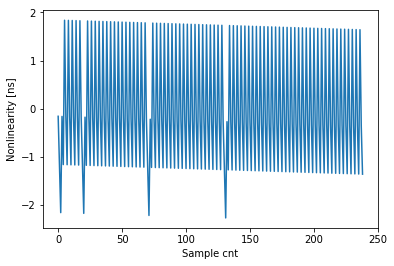

In [28]:
# plot deviation nonlinearity (from linear regression)
m,b = np.polyfit(np.arange(0,len(deviation)),deviation,1);
linreg = m*np.arange(0,len(deviation))+b;
#plt.plot(linreg)
nonlin = deviation - linreg;

m,b = np.polyfit(np.arange(0,len(deviation_avg)),deviation_avg,1);
linreg_avg = m*np.arange(0,len(deviation_avg))+b;
nonlin_avg = deviation_avg - linreg_avg;


plt.plot(nonlin);
plt.xlabel('Sample cnt');
plt.ylabel('Nonlinearity [ns]');

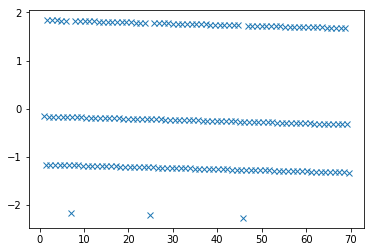

In [29]:
#examine the nonlinearity close
plt.plot(ptp0[avg_factor:200]/1e9,nonlin[avg_factor:200],'x');
#plt.plot(ptp0[avg_factor:200]/1e9,nonlin_avg[avg_factor:200]);


Sample period:


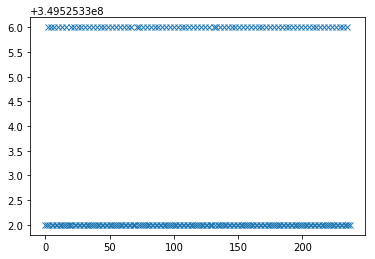

Minimum delta time: 349.525332ms
Maximum delta time: 349.525336ms
Sample period for the first 40 sample


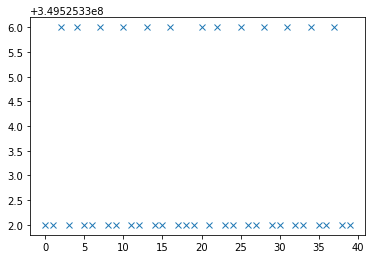

Max delta difference: 0.000004ms
Delta  differfence


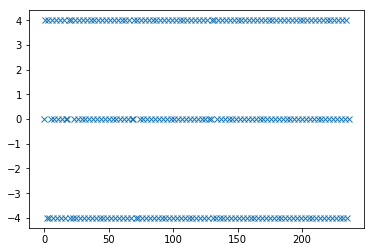

Software limitation ???
Possibly: timestamps are represented with 256ns resolution.


In [30]:
# calculating how match global time passed between sampling points
delta_global = np.diff(ptp0);
print "Sample period:"
plt.plot(delta_global,'x');
plt.show();

delta_min = np.min(delta_global)/1e6;
delta_max = np.max(delta_global)/1e6;
print "Minimum delta time: %lfms" % (delta_min)
print "Maximum delta time: %lfms" % (delta_max)


sample_cnt = 40;
print "Sample period for the first %d sample" % sample_cnt
plot(delta_global[0:sample_cnt],'x');
show()

print "Max delta difference: %lfms" % (delta_max - delta_min)
print "Delta  differfence"
dd = np.diff(delta_global);
plot(dd,'x');
show()
print "Software limitation ???"
print "Possibly: timestamps are represented with 256ns resolution."

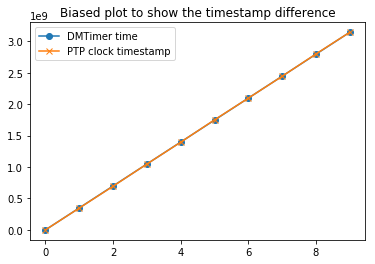

In [31]:
h = hw0[0:10];
p = ptp0[0:10];
d = h-p;

if fname == 'log_local.txt':
    p2 = h-2000000*d;
else:
    p2 = h-50000*d; #2000000*d;
    
plot(h,'-o',label = 'DMTimer time');
plot(p2,'-x', label='PTP clock timestamp');
title("Biased plot to show the timestamp difference")
legend();